In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import exowrap

# Load the entire grid into memory instantly
master_df = pd.read_pickle("../data/grid/master_grid_results.pkl")

print(f"Loaded {len(master_df)} successful ExoREM models!")

# Let's see what unique parameters are available in our grid
print("Available Internal Temps (T_int):", master_df['input_param_T_int'].unique())
print("Available Gravities (g_1bar):", master_df['input_param_g_1bar'].unique())
print("Available Metallicities (Met):", master_df['input_param_Met'].unique())

Loaded 16 successful ExoREM models!
Available Internal Temps (T_int): [300 500 600]
Available Gravities (g_1bar): [10. 15. 20.]
Available Metallicities (Met): [0.5 0. ]


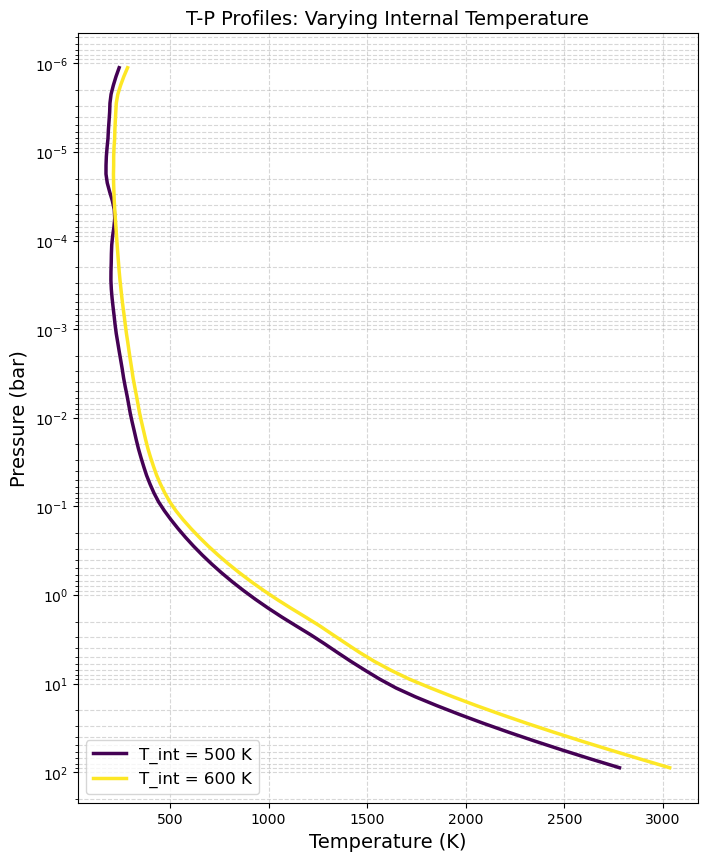

In [9]:
# 1. Filter the grid to keep gravity and metallicity constant
subset_tp = master_df[
    (master_df['input_param_g_1bar'] == 10.0) & 
    (master_df['input_param_Met'] == 0.0)
].sort_values('input_param_T_int') # Sort so our legend is in order

# 2. Create a shared canvas
fig, ax = plt.subplots(figsize=(8, 10))

# 3. Choose a colormap so the lines look nice together
colors = plt.cm.viridis(np.linspace(0, 1, len(subset_tp)))

# 4. Loop through our filtered models and plot them!
for (index, row), color in zip(subset_tp.iterrows(), colors):
    
    # Our plotting functions expect a DataFrame, not a Pandas Series.
    # We slice the master_df using the index to keep it as a 1-row DataFrame.
    single_model_df = master_df.loc[[index]]
    
    t_int = row['input_param_T_int']
    
    # Plot it on our shared axis
    exowrap.plot_tp_profile(
        single_model_df, 
        ax=ax, 
        color=color, 
        lw=2.5,
        title="T-P Profiles: Varying Internal Temperature"
    )

# 5. Fix the legend to show the different T_ints
legend_labels = [f"T_int = {t} K" for t in subset_tp['input_param_T_int']]
ax.legend(legend_labels, loc='lower left', fontsize=12)

plt.show()

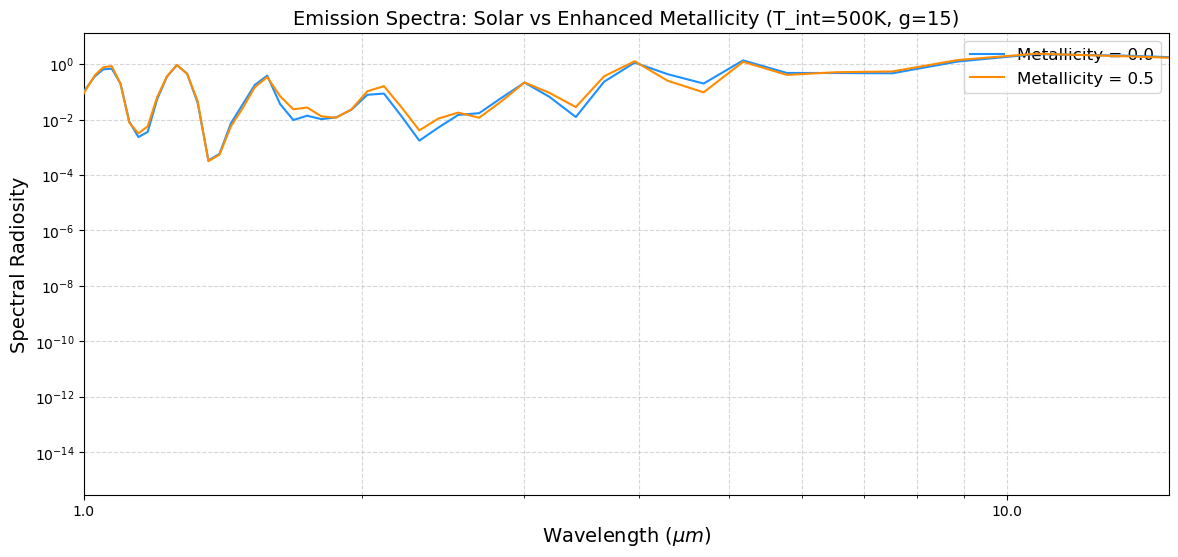

In [11]:
# 1. Filter the grid: Lock T_int and Gravity, but let Metallicity vary
subset_spec = master_df[
    (master_df['input_param_T_int'] == 500) & 
    (master_df['input_param_g_1bar'] == 10.0)
].sort_values('input_param_Met')

# 2. Create the canvas
fig, ax = plt.subplots(figsize=(14, 6))

colors = ['dodgerblue', 'darkorange'] # One color for Met=0.0, one for Met=0.5

# 3. Plot the spectra
for (index, row), color in zip(subset_spec.iterrows(), colors):
    single_model_df = master_df.loc[[index]]
    
    exowrap.plot_emission_spectrum(
        single_model_df, 
        ax=ax, 
        color=color, 
        lw=1.5,
        title="Emission Spectra: Solar vs Enhanced Metallicity (T_int=500K, g=15)"
    )

# 4. Zoom in on the near-infrared (where JWST looks)
ax.set_xlim(1, 15)

# 5. Add our custom legend
legend_labels = [f"Metallicity = {m}" for m in subset_spec['input_param_Met']]
ax.legend(legend_labels, loc='upper right', fontsize=12)

plt.show()